## - CRISP-DM Data Science Process
## - Exploratory Data Analysis (EDA)
## - Data Preparation

## 1- CRoss Industry Standard Process for Data Mining (CRISP-DM) 
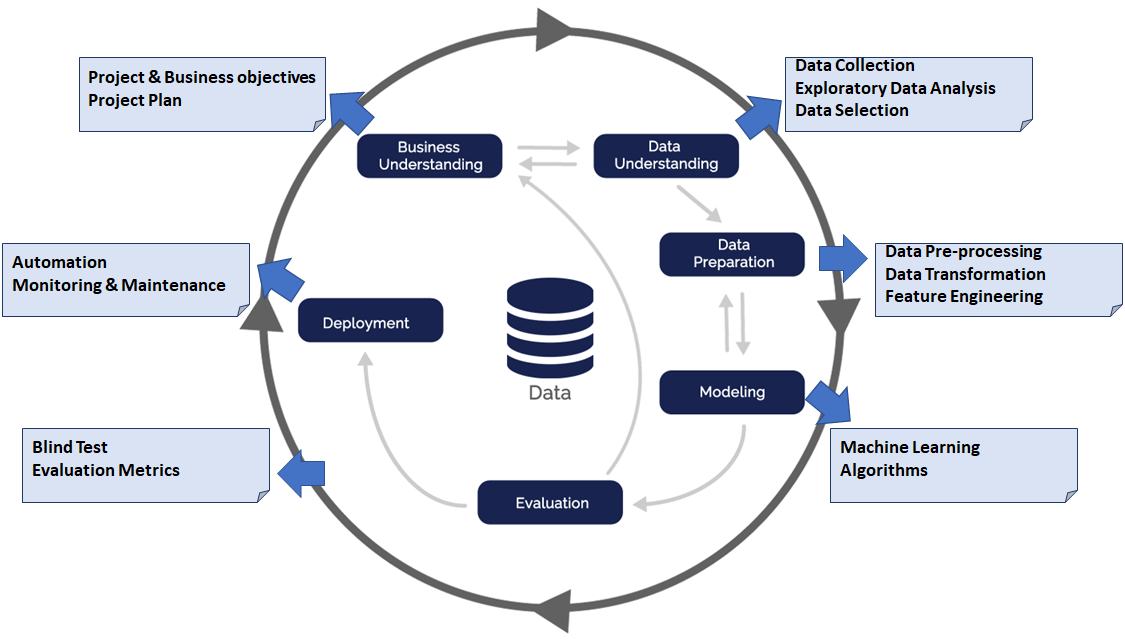

### Standard Machine Learning Project Pipeline
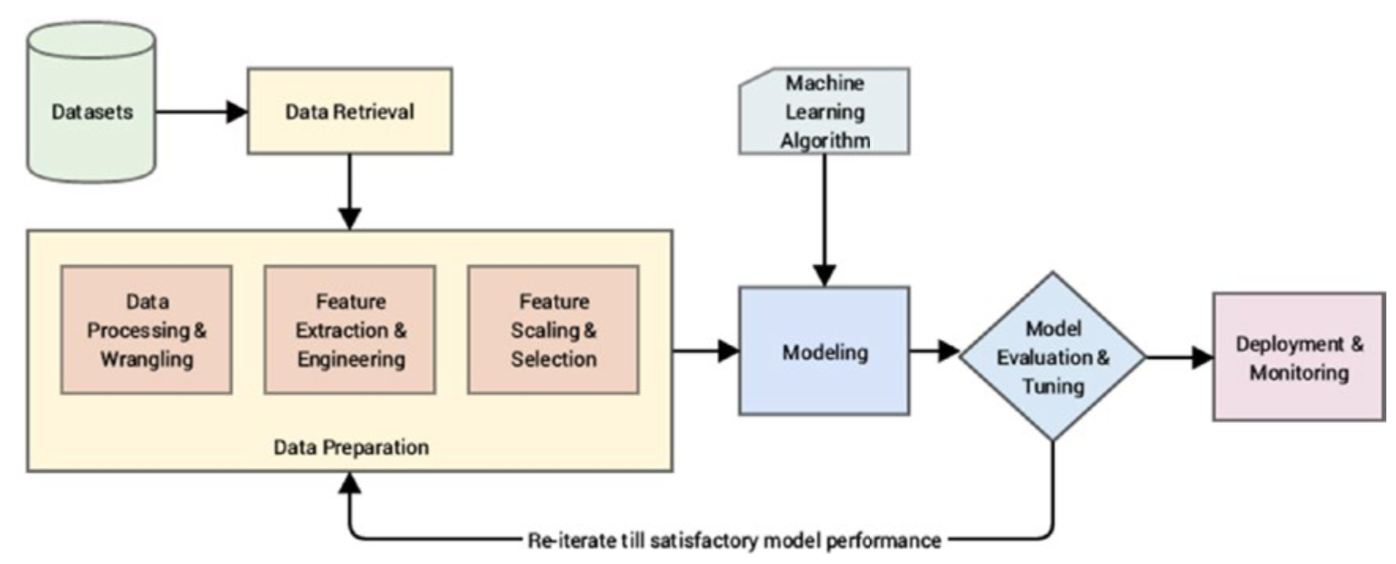

## 2- Exploratory Data Analysis (EDA)

### - Gain a better understanding of data
### - Assess  the quality of data 
### - Extract important variables and their relationships
### - Summarize main characteristics by visualization, descriptive statistics, etc.


In [40]:
# Working with Real Data "California Housing Prices dataset" (https://www.kaggle.com/camnugent/california-housing-prices)

# Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading the dataset into a dataframe
housing = pd.read_csv('D:/AI_ML_L2/housing.csv')

# dataset's shape (n_obervations and n_features)
print("housing's shape : ", housing.shape)

# Show the first 5 observations (rows)
housing.head()

housing's shape :  (20640, 10)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### (Q1): What is the project objective? 

In [41]:
#  Checking the types of data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### (Q2): By observing the obtained result, what can we conclude? 

In [42]:
# Checking the missing values
missing = housing.isna().sum()
print(missing)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [43]:
# Get the descriptive statistics

housing.describe() # it ignores NULL values 

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

### (Q3): By observing the obtained result, what can we conclude ? 

### (Q4): What operations should be applied in data preparation ? 

In [44]:
#  Get the duplicate rows 
dupplicated_rows_df = housing[housing.duplicated()]

# Dupplicated_rows_df's shape 
print("dupplicated_rows_df's shape : ", dupplicated_rows_df.shape)

# Drop duplicated rows using "drop_duplicates"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

dupplicated_rows_df's shape :  (0, 10)


### (Q5): By observing the obtained result, what can we conclude? 

In [45]:
#  Find out the unique value of the selected column
ocean_proximity = housing['ocean_proximity'].unique()
print(ocean_proximity)

# Get count of each category
housing["ocean_proximity"].value_counts()

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### (Q6): What operation should be applied for this feature in data preparation? 

In [46]:
# Get categorical features
cat_features = housing.select_dtypes(include=[object]).columns
print(cat_features)

Index(['ocean_proximity'], dtype='object')


### (Q7): How to get numerical features (hint: np.number)

### Quartiles

Quartiles are the values that divide a list of ordered numbers into quarters: 
(1) Put the list of numbers in order;
(2) Then cut the list into four equal parts; 
(3) The Quartiles are at the "cuts"
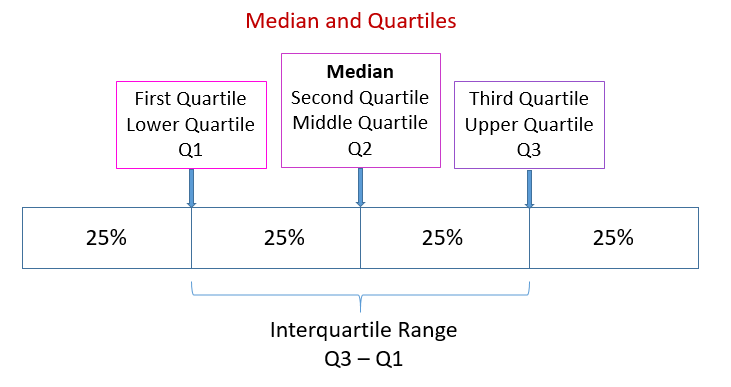
### (Q8): What is InterQuartile Range? 

### Outlier detection from Inter-Quartile Range

### (1) Find out the interquartile range IQR = Q3-Q1;
### (2) Choose a multiplier, K, typically equal to 1.5;
### (3) Any data point which is less than Q1–1.5 IQR or Q3+1.5 IQR is an outlier. 

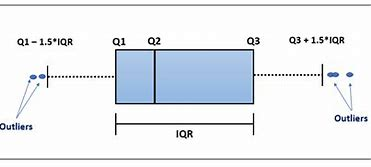

In [47]:
def outlier_detection(df, variable):
    
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
 
    #lower and upper limits
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr   
    print(f'Q1={q1:.3f}, Q3={q3:.3f}, IQR={iqr:.3f}, lower={lower:.3f}, upper={upper:.3f}')
  
    outliers = []
    for index, x in enumerate(df[variable]):
        if x <= lower or x >= upper:
            outliers.append(index)
    return outliers

outliers = outlier_detection(housing, 'total_bedrooms')
print("Number of outliers = ", len(outliers))

Q1=296.000, Q3=647.000, IQR=351.000, lower=-230.500, upper=1173.500
Number of outliers =  1271


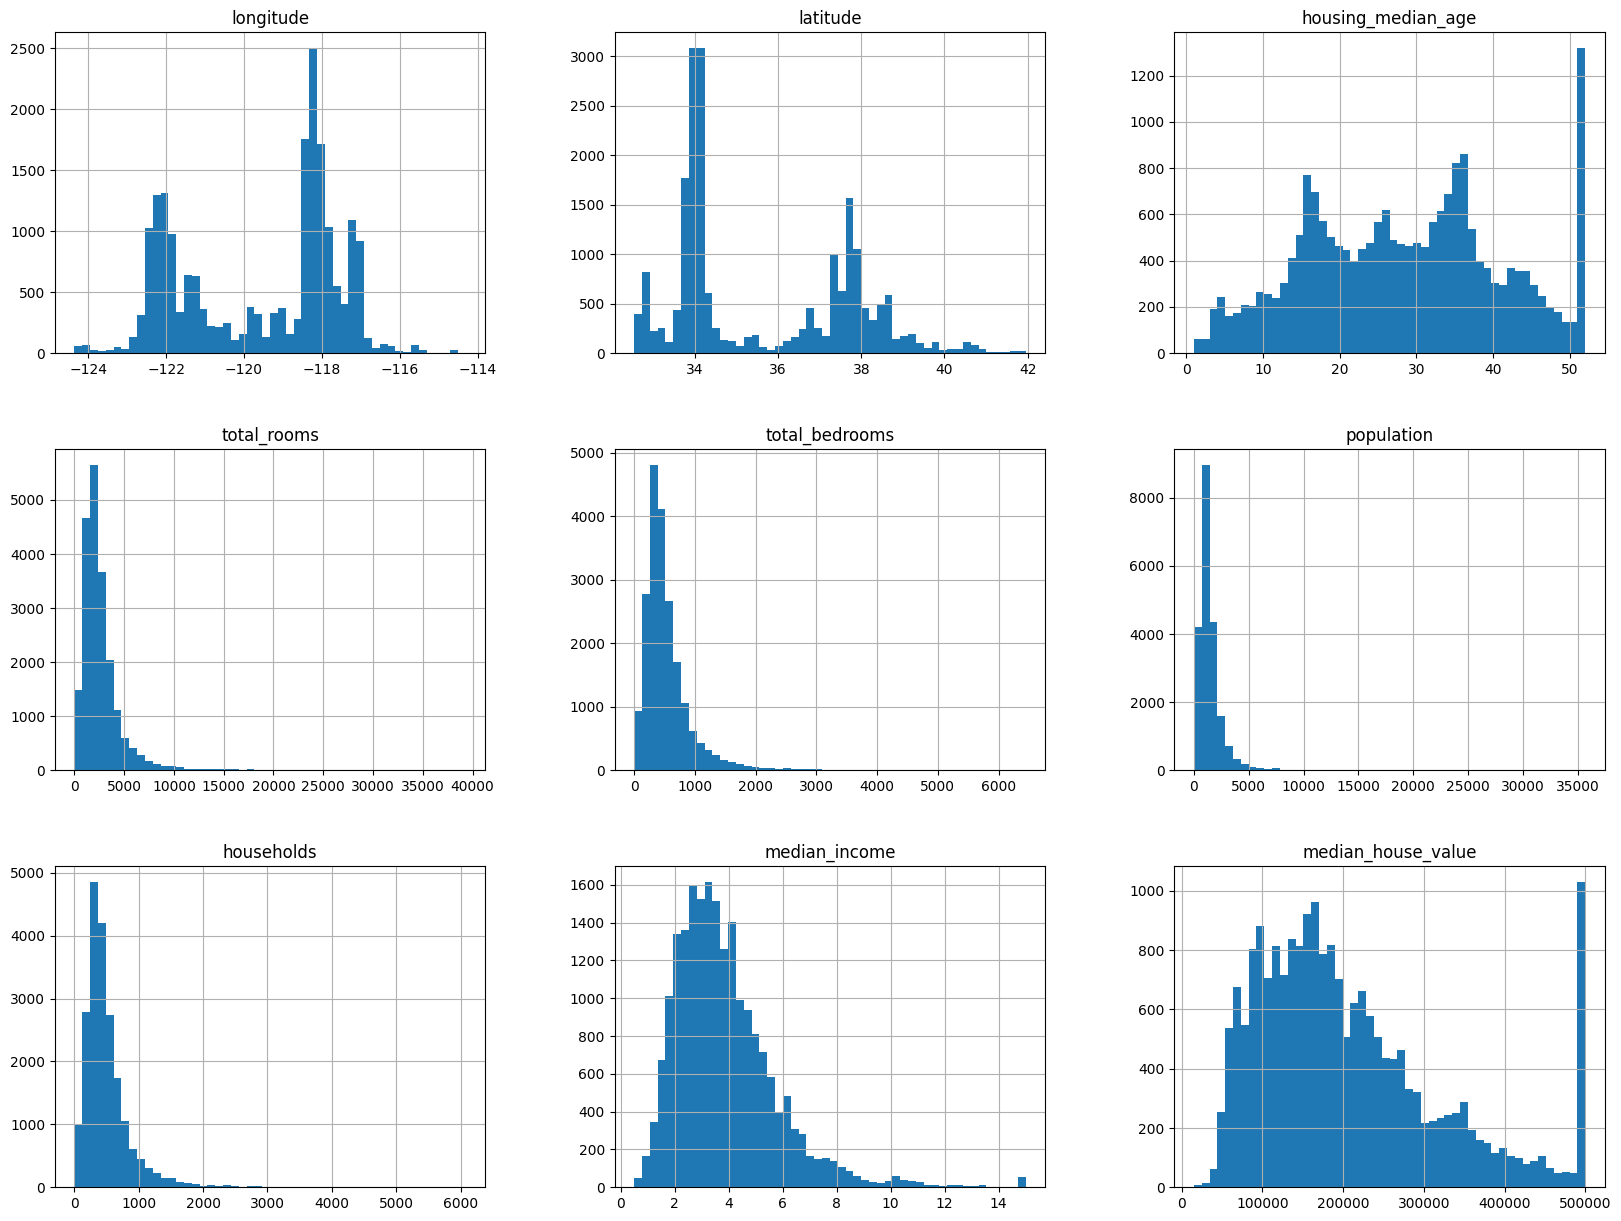

In [48]:
## Visualization of histograms of numerical features

housing.hist(bins=50, figsize=(20,15))
plt.show()

### (Q9): By observing these histograms, what can we conclude? 

### (Q10): What operations should be applied in data preparation ? 

+ `housing_median_age` and `median_house_value` are limited to maximal values. 
=> The ML algorithm can't be trained on  `median_house_value` > 500000 USD. 
=> The ML model should be evaluated only for `median_house_value` <= 500000 USD.
+ Feature have different scales. 
==> Feature scaling with standardization.
+ Some features have heavy tailed (`kurtosis`: a measure of the tailedness) et skewed (`skewness` : a measure of asymmetry) distributions.
==>  Transform theses distributions (with `PowerTransformer`) for more performant ML models.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html


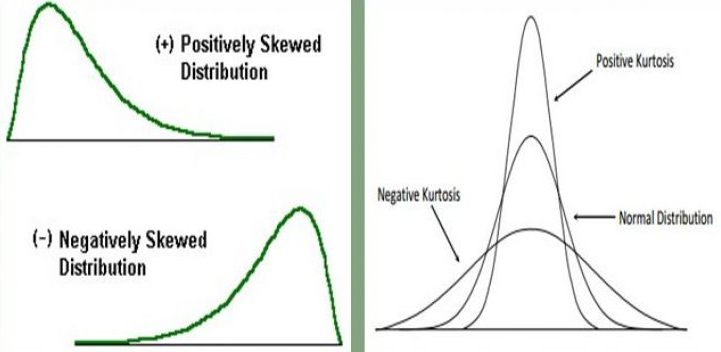



### Desired values for SKEWNESS and KURTOSIS:

##### Skewness

Skewness measures the asymmetry of the distribution of data:

* Zero Skewness: Indicates a perfectly symmetrical distribution around its mean.
* Positive Skewness: Indicates that the tail on the right side of the distribution (more positive values) is longer or fatter than the left side, suggesting that the bulk of the data is concentrated on the left.
* Negative Skewness: Indicates that the tail on the left side of the distribution (more negative values) is longer or fatter than the right side, suggesting that the bulk of the data is concentrated on the right.

A skewness near zero is often desirable because many statistical tests and models assume (or perform better with) symmetric distributions. However, in some contexts, such as financial returns or certain types of process data, some skewness might be expected or normative.

#### Kurtosis

Kurtosis measures the tails of the distribution and indicates whether the data are heavy-tailed or light-tailed relative to a normal distribution:

* Kurtosis about 3 (mesokurtic): Resembles the kurtosis of a normal distribution, which has kurtosis of exactly 3. Such distributions are said to have "normal" tails.
* High Kurtosis (>3, leptokurtic): Indicates heavy tails. This can imply a high risk of outliers.
* Low Kurtosis (<3, platykurtic): Indicates light tails. This might suggest a lower risk of outliers but also less variability.

A kurtosis close to 3 is typically preferred for models based on normal distribution assumptions, like many parametric statistical tests, which assume mesokurtic distributions.



In summary, the best values for these statistics depend on the nature of your data and your analytical goals. In many cases:

* A standard deviation that aligns with acceptable variability for the task at hand.
* A skewness close to zero for symmetry.
* A kurtosis near 3 for normal-tailed distributions.



In [49]:
# Compute `skewness` of features
num_features = housing.select_dtypes(include=[np.number]).columns
skewness = housing[num_features].skew()
print(skewness)

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64


In [50]:
# Compute `kurtosis` of features
kurtosis = housing[num_features].kurtosis()
print(kurtosis)

longitude             -1.330152
latitude              -1.117760
housing_median_age    -0.800629
total_rooms           32.630927
total_bedrooms        21.985575
population            73.553116
households            22.057988
median_income          4.952524
median_house_value     0.327870
dtype: float64


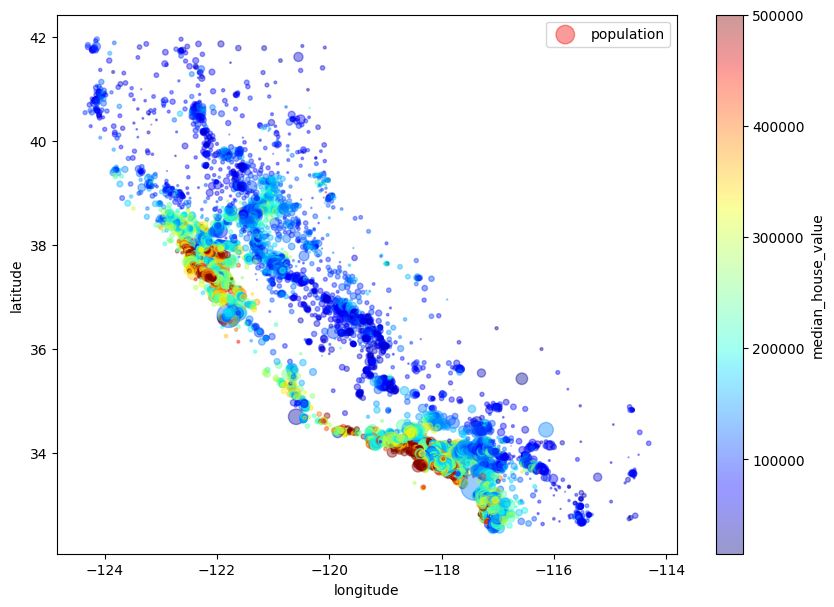

In [51]:
# Extract insights by visualization
# `alpha' : density of points
# `s` = size of a point is propotional to 'population'
# 'c' = color of a point is propotional to 'median_house_value' (colormap = 'jet' : from blue to red)
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100., 
             label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True)
plt.legend()

### (Q11): By observing this figure, what can we conclude? 

In [52]:
# Correlation or dependence (in [-1,1]) is a statistical relationship between two random variables. 
# If two variables are correlated then the variation of one variable affects the variation of the other variable.

# Compute correlation betwwen `population` and `median_house_value` :
housing[['population', 'median_house_value']].corr()

population  median_house_value
population             1.00000            -0.02465
median_house_value    -0.02465             1.00000

### (Q12): By observing this result, what can we conclude? 

<Axes: >

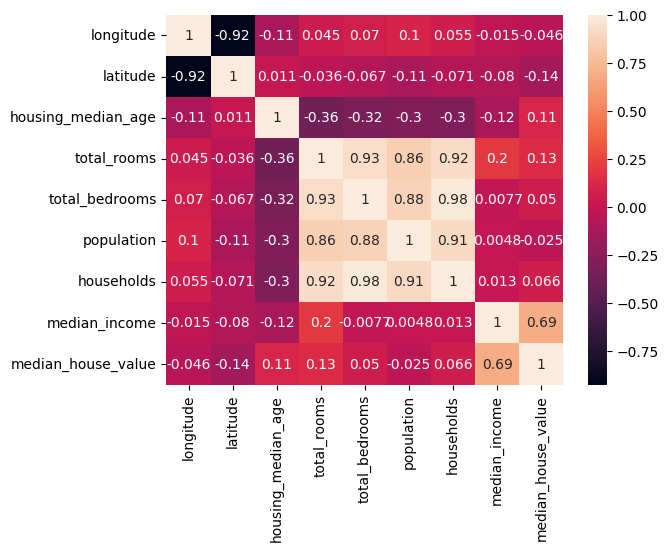

In [53]:
# Correlation between numerical variables : a symmetric 10x10 matrix
corr_matrix = housing[num_features].corr()
sns.heatmap(corr_matrix, annot=True)

In [54]:
# Correlation of target variable `'median_house_value` with other variables
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### (Q13): By observing this result, what can we conclude? 

### Correlations between two variables
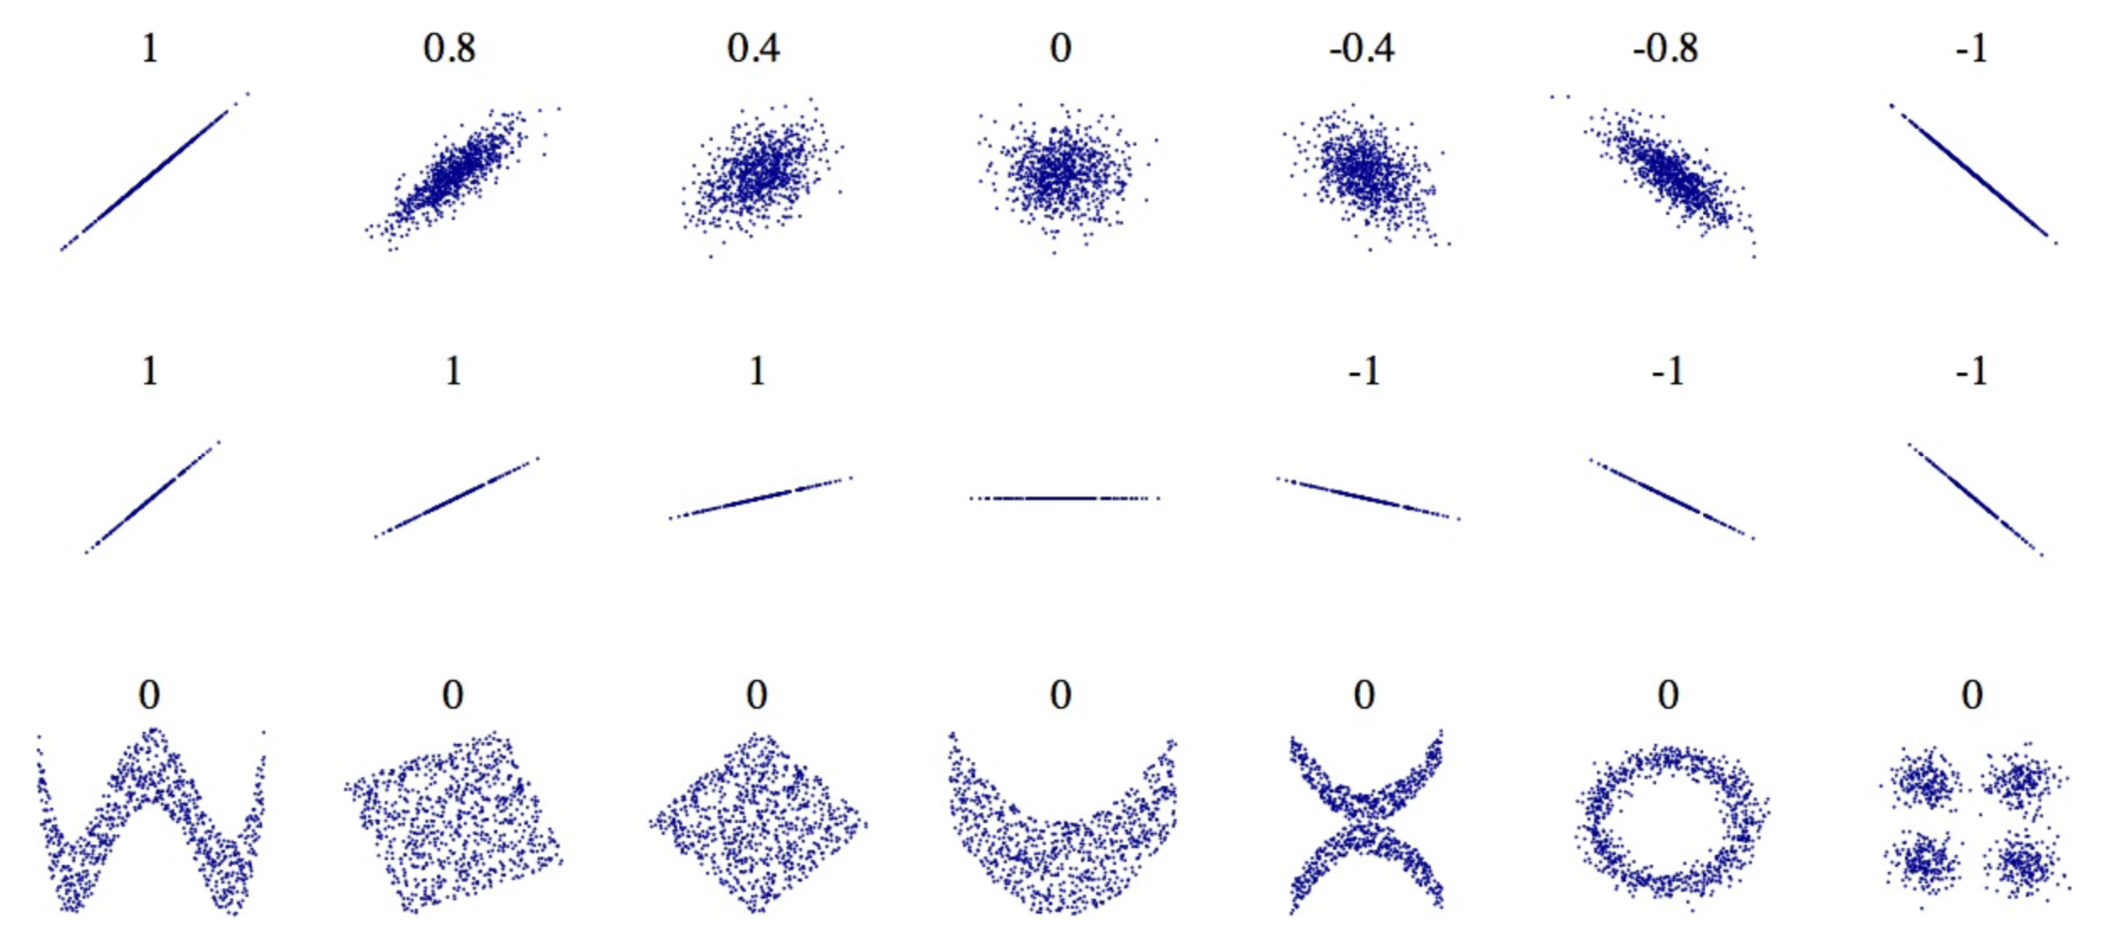

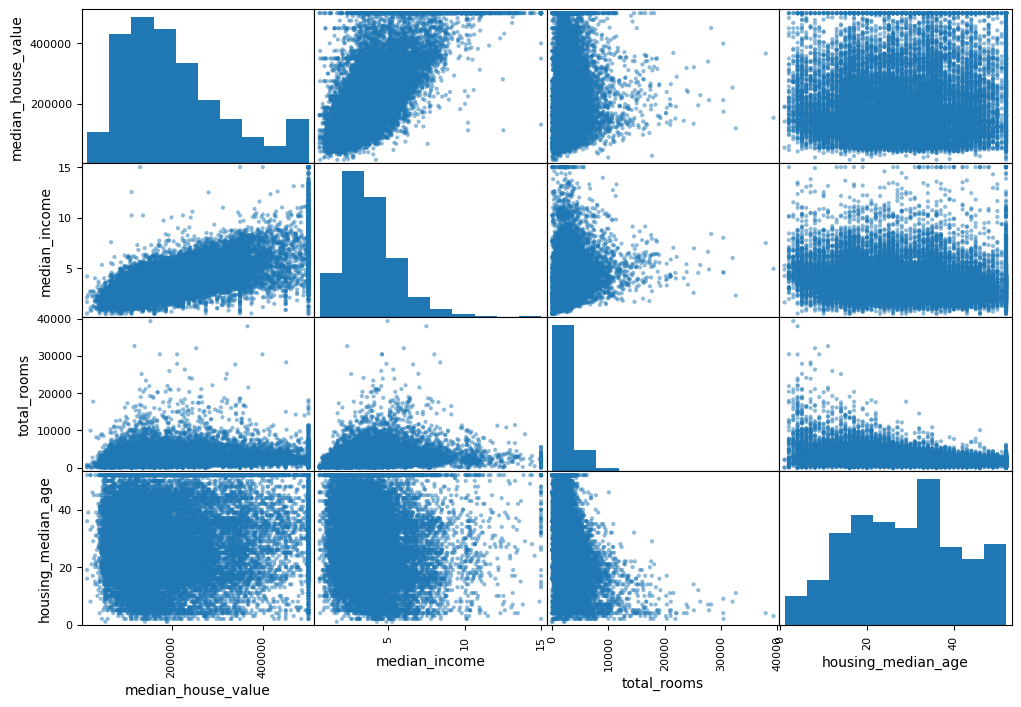

In [55]:
from pandas.plotting import scatter_matrix
# the 3 more correlated features to 'median_house_value'
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(frame=housing[attributes], figsize=(12, 8))
plt.show()

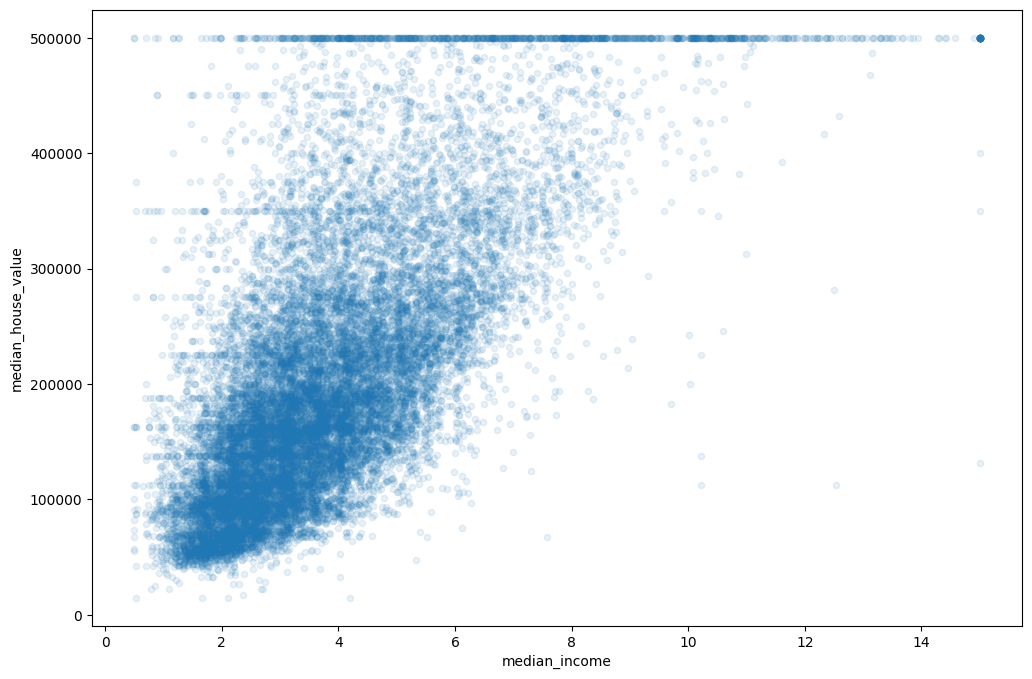

In [56]:
# ==> The most important feature for `median_house_value` prediction is `median_income`
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,8), alpha=0.1)
plt.show()

## 3- Data Preparation
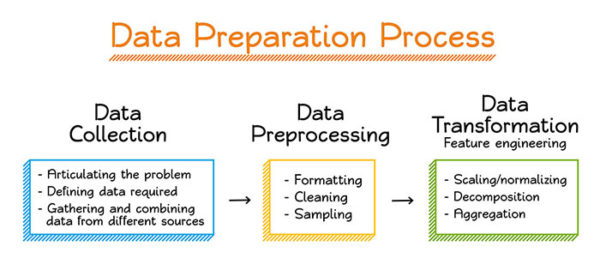

# Data Preparation for Structured Data
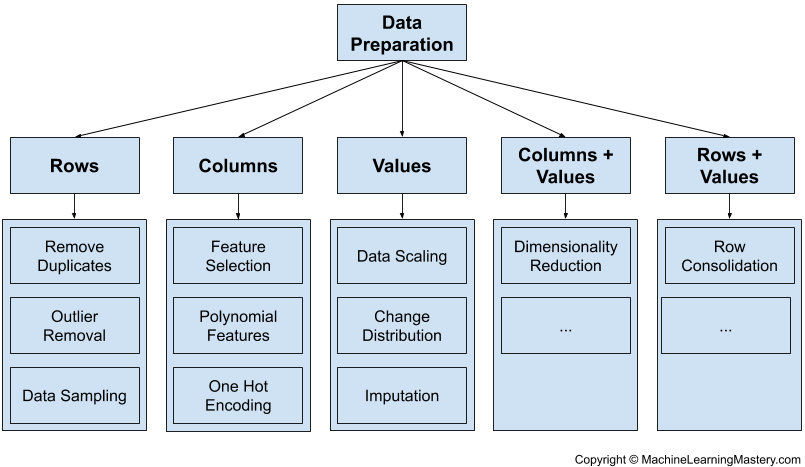

### Data Preparation of Housing Dataset
+ Dropping duplicated observations if they exist.
+ Feature Engineering : derive new features by combining some other features.
+ Dropping highly correlated features (abs(corr)>0.98).
+ Spliting the dataset into training and test sets.
+ Handling missing values.
+ Transformating distributions and scaling features.
+ Encoding the categorical feature.

In [57]:
# Drop duplicates
housing = housing.drop_duplicates()

# Feature Engineering : feature combination
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

# drop 'total_bedrooms' because it's highly correlated to households (corr = 0.98) : 
# ==> 'total_bedrooms' gives the same information as households
# corr('total_bedrooms','median_house_value') =  0.049686 < 
# corr('households','median_house_value') =  0.065843 ==> drop 'total_bedrooms' 
      
housing.drop(['total_bedrooms'], axis=1, inplace=True)
num_features = housing.select_dtypes(include=[np.number]).columns
# check the correlation 
corr_matrix = housing[num_features].corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### (Q14): By observing this result, what can we conclude about derived features? 

### Train and Test Split  

+ Random split with the function `train_test_split`
+ $80\%$ training set
+ $20\%$ testing set
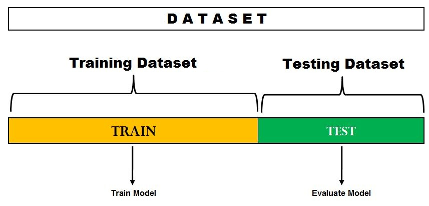

In [58]:
from sklearn.model_selection import train_test_split

X = housing.drop("median_house_value", axis=1) # input variables (X is dataframe)
y = housing["median_house_value"].to_numpy() # output variable (y is an array)

# `stratify` makes a split with the same proportion of y in training and testing sets
bins = np.linspace(y.min(), y.max(), 100)
y_binned = np.digitize(y, bins)

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, shuffle=True, stratify=y_binned,random_state=22)

print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))

X_train: (16512, 11) X_test: (4128, 11)


In [59]:
# 3 options to handle missing values (nan, null) of `total_bedrooms`
#   + drop rows of missing values:
#   housing.dropna(subset='total_bedrooms')

#   + drop the feature 'total_bedrooms` :
#   housing.drop('total_bedrooms', axis=1)
     
#   + Impute with a value (0, mean, median, etc.)

# Example:
from sklearn.impute import SimpleImputer
inputer = SimpleImputer(strategy="mean")
inputer.fit_transform([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  5. ,  9. ]])

In [60]:
# Feature scaling : StandardScaler : mean = 0 et std = 1
from sklearn.preprocessing import StandardScaler

# create a matrix (3x3) with values in [1,10]
data = np.random.randint(1, 10, (3, 3))
print(data)

# build the scaler 
scaler = StandardScaler().fit(data)
print("\nmean", scaler.mean_)
# Scaling des variables
data_scaled = scaler.transform(data)
print(data_scaled)

# scaled data has mean=0. and std=1.
print("\nMean:", data_scaled.mean(), "Std:", data_scaled.std())

[[9 5 1]
 [4 1 2]
 [3 3 2]]

mean [5.33333333 3.         1.66666667]
[[ 1.3970014   1.22474487 -1.41421356]
 [-0.50800051 -1.22474487  0.70710678]
 [-0.88900089  0.          0.70710678]]

Mean: -3.700743415417188e-17 Std: 1.0


In [61]:
# Encoding categorical variables using OnehotEncoder
from sklearn.preprocessing import OneHotEncoder

data = [["ROUGE"], ["ROUGE"], ["JAUNE"], ["VERT"], ["JAUNE"]]
encoder = OneHotEncoder().fit(data)
data_hot = encoder.transform(data).toarray()

print(data_hot)
print(encoder.categories_)
del data #suppression of data

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[array(['JAUNE', 'ROUGE', 'VERT'], dtype=object)]


In [62]:
# Biuild a pre-processing pipeline that (1) imputes missing values, transforms distributions and scales numerical variables 
# (2) encode categorical variables

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

# Print numerical features
num_features = X_train.select_dtypes(include=[np.number]).columns
print(num_features)

# Print categorical features
cat_features = X_train.select_dtypes(include=[object]).columns
print(cat_features)

num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), 
                         ("transformer", PowerTransformer(method='yeo-johnson', standardize=True))])

# full_pipeline applies num_pipeline on numerical variables and encodes categorical variables
full_pipeline = ColumnTransformer([("num", num_pipeline, num_features), ("cat", OneHotEncoder(), cat_features)])

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


In [63]:
# Show the full-pipeline
print(full_pipeline)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('transformer',
                                                  PowerTransformer())]),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['ocean_proximity'], dtype='object'))])


In [64]:
# train the full_pipeline on training data
full_pipeline = full_pipeline.fit(X_train)

# Apply full_pipeline on training and testing sets
X_train = full_pipeline.transform(X_train)
X_test = full_pipeline.transform(X_test)

print("\n X_train:", X_train.shape, "X_test:", X_test.shape)


 X_train: (16512, 15) X_test: (4128, 15)


### (Q15): By observing this result, what do you notice? 

In [65]:
# save the prepared training dataset into a dataframe then a csv file

features = num_features.to_numpy()
# columns names of the dataframe
features = np.concatenate((features, ['ocean_1', 'ocean_2', 'ocean_3', 'ocean_4', 'ocean_5', 'median_house_value']), axis=0)
print(features)

df_train = pd.DataFrame(np.concatenate((X_train, y_train[:, np.newaxis]), axis=1), columns=features)
df_train.to_csv('housing_train.csv', index=False)
df_train.head()

['longitude' 'latitude' 'housing_median_age' 'total_rooms' 'population'
 'households' 'median_income' 'rooms_per_household' 'bedrooms_per_room'
 'population_per_household' 'ocean_1' 'ocean_2' 'ocean_3' 'ocean_4'
 'ocean_5' 'median_house_value']


longitude  latitude  housing_median_age  total_rooms  population  \
0 -1.498801e-15  0.872078           -0.821368     1.060025    0.762658   
1 -1.471046e-15  0.861019           -0.652535     1.449561    1.413273   
2  2.053913e-15 -1.372369            0.606412    -1.014326   -1.572720   
3 -1.526557e-15  0.890389           -0.243525     0.579703    0.367230   
4 -2.220446e-16  0.660449            1.407146    -0.671688   -0.045275   

   households  median_income  rooms_per_household  bedrooms_per_room  \
0    1.810501       0.078757            -1.545452           1.586059   
1    1.505998       0.637755             0.033086          -0.145523   
2   -1.511673      -0.326826             1.523596           0.446924   
3    0.547590       0.833675             0.152906          -0.305407   
4   -0.356063      -1.907712            -0.961195           1.693039   

   population_per_household  ocean_1  ocean_2  ocean_3  ocean_4  ocean_5  \
0                 -2.511716      1.0      0.0      0.0      0.0      0.0   
1                 -0.097845      1.0      0.0      0.0      0.0      0.0   
2                 -0.226179      0.0      1.0      0.0      0.0      0.0   
3                 -0.401924      1.0      0.0      0.0      0.0      0.0   
4                  0.889069      0.0      1.0      0.0      0.0      0.0   

   median_house_value  
0            240000.0  
1            250000.0  
2            134400.0  
3            287600.0  
4             49600.0

### (Q16): save the prepared testing dataset into a dataframe then a csv file 
### (Q17): save the full_pipeline for deployment

In [66]:
df_test = pd.DataFrame(np.concatenate((X_test, y_test[:, np.newaxis]), axis=1), columns=features)
df_test.to_csv('housing_test.csv', index=False)
df_test.head()

longitude  latitude  housing_median_age  total_rooms  population  \
0 -1.942890e-16  0.684476           -0.736535    -0.482003   -0.302538   
1 -1.665335e-16 -0.488562           -0.084404     0.830653    0.568589   
2 -1.110223e-16  0.502597            0.755156     0.543519    0.211104   
3 -1.471046e-15  0.890389            1.758741     0.023673    0.003336   
4  6.938894e-16 -0.756130           -0.993752    -3.363676   -3.809716   

   households  median_income  rooms_per_household  bedrooms_per_room  \
0   -0.120648      -1.726609            -1.045459           1.449302   
1    0.908369       0.315645            -0.080220           0.010225   
2    0.368740      -0.421444             0.490798          -0.537571   
3    0.354319      -0.410195            -0.835306           0.926268   
4   -3.937836       1.732079             3.803370          -3.332458   

   population_per_household  ocean_1  ocean_2  ocean_3  ocean_4  ocean_5  \
0                 -0.489332      0.0      1.0      0.0      0.0      0.0   
1                 -0.783875      0.0      0.0      0.0      0.0      1.0   
2                 -0.359413      0.0      1.0      0.0      0.0      0.0   
3                 -0.921908      1.0      0.0      0.0      0.0      0.0   
4                  1.515489      1.0      0.0      0.0      0.0      0.0   

   median_house_value  
0             47500.0  
1            395100.0  
2             85500.0  
3            209500.0  
4            500001.0

In [67]:
# To maximise reproducibility, we‘d like to use this pipeline repeatedly for our new incoming data. 
# Let’s save the pipeline by using ‘joblib’ package to save it as a pickle file.
import joblib
joblib.dump(full_pipeline, 'full_pipeline.pkl')

# Now we can call this pipeline, which includes all sorts of data preprocessing we need.
loaded_pipeline = joblib.load('full_pipeline.pkl')
print(loaded_pipeline)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('transformer',
                                                  PowerTransformer())]),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['ocean_proximity'], dtype='object'))])
